In [2]:
import numpy as np
import copy

from __future__ import print_function

import time
from PIL import Image

from scipy.optimize import fmin_l_bfgs_b
from scipy.misc import imsave

from keras import backend
from keras.models import Model
from keras.applications.vgg16 import VGG16

from keras.models import Model
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


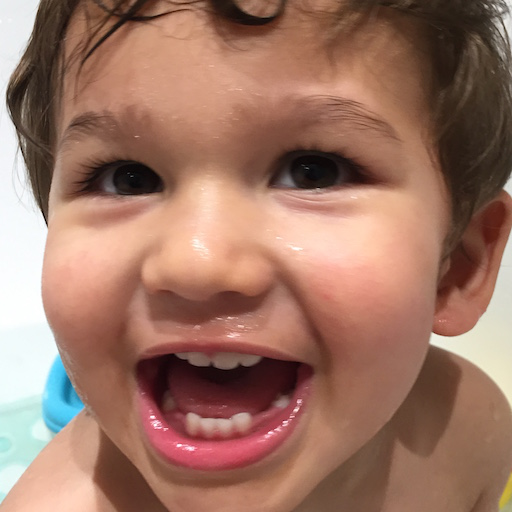

In [3]:
#defining the height and width of the all the three images
image_height = 512
image_width = 512
#loading our content image
content_image_path = 'hugo.jpg'
content_image = Image.open(content_image_path)
#resizeing our content image
content_image = content_image.resize((image_height,image_width))
#printing our content image
content_image



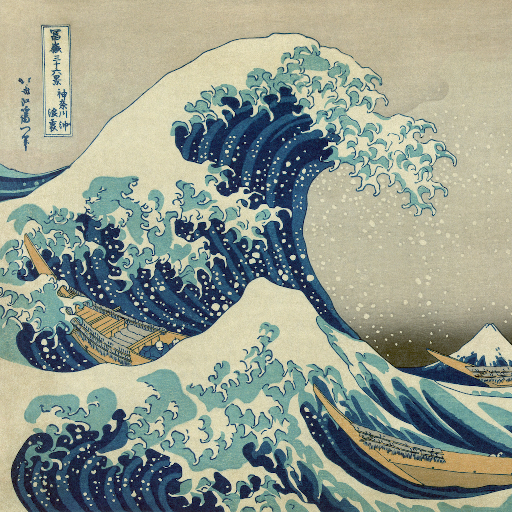

In [5]:

#loading and resize our two style images
style_image_path = 'wave.jpg'
style_image_path2 = 'picasso.jpg'

style_image = Image.open(style_image_path)
style_image2 = Image.open(style_image_path2)

style_image = style_image.resize((image_height,image_width))
style_image2 = style_image2.resize((image_height,image_width))

style_image




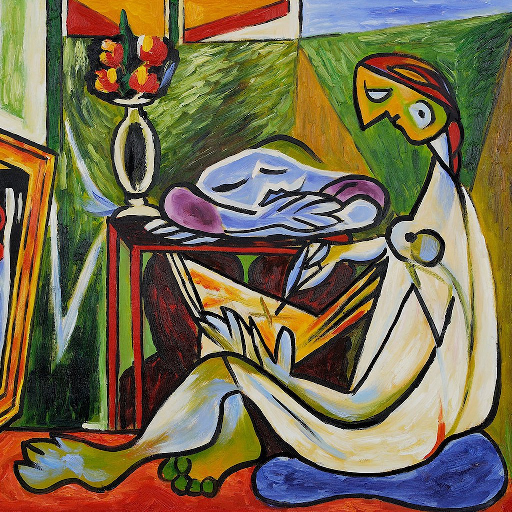

In [6]:
style_image2


In [7]:
#Converting image pixels into numpy array so that computationally suitable
content_array = np.asarray(content_image, dtype='float32')
#here we are adding an extra dimention to the image so that we can concatinate all three images together
content_array = np.expand_dims(content_array, axis=0)
print(content_array.shape)

#Converting image pixels into numpy array so that computationally suitable
style_array = np.asarray(style_image, dtype='float32')
#here we are adding an extra dimention to the image so that we can concatinate all three images together
style_array = np.expand_dims(style_array, axis=0)
print(style_array.shape)

#Converting image pixels into numpy array so that computationally suitable
style_array2 = np.asarray(style_image2, dtype='float32')
#here we are adding an extra dimention to the image so that we can concatinate all three images together
style_array2 = np.expand_dims(style_array2, axis=0)
print(style_array2.shape)


(1, 512, 512, 3)
(1, 512, 512, 3)
(1, 512, 512, 3)


<p>Here we will perform two important steps</p>
<ol>
<li>substracting the mean RGB values from each pixel of all the three images</li>
<li>Converting images from RGB to BGR as VGG16 model takes input images in BGR format</li>
</ol>


In [12]:
#substracting mean RGB values from each pixel
content_array[:, :, :, 0] -= 103.939
content_array[:, :, :, 1] -= 116.779
content_array[:, :, :, 2] -= 123.68
#Converting RGB to BGR
content_array = content_array[:, :, :, ::-1]

style_array[:, :, :, 0] -= 103.939
style_array[:, :, :, 1] -= 116.779
style_array[:, :, :, 2] -= 123.68
style_array = style_array[:, :, :, ::-1]

style_array2[:, :, :, 0] -= 103.939
style_array2[:, :, :, 1] -= 116.779
style_array2[:, :, :, 2] -= 123.68
style_array2 = style_array2[:, :, :, ::-1]



In [11]:
print(content_array.shape)

(1, 512, 512, 3)


In [14]:

#Here we are defining these arrays to the tensorflow variable using keras' backend
content_image = backend.variable(content_array)
style_image = backend.variable(style_array)
style_image2 = backend.variable(style_array2)
#we are declaring a placeholder to store our output later
combination_image = backend.placeholder((1, image_height, image_width, 3))



In [15]:
#here we concatinate our images into a single tensor thats is suitable for processing by keras' vgg16 model 
input_tensor = backend.concatenate([content_image,
                                    style_image,
                                    style_image2,
                                    combination_image], axis=0)

<p>Now we put our tensor into the vvg16 model</p>
<p>vgg16 model is a 16 layer cnn which was prepared by oxford's visual geometry group which won imagnet challenge in 2015</p>
<p>vgg16 file is 500mb file</p>


In [19]:

#here we dont want to classsify our image 
#so we set include_top as false
#which remove vgg16's pooling and fully connected layers
model = VGG16(input_tensor=input_tensor, weights='imagenet',
              include_top=False)



In [18]:


content_weight = 0.025
style_weight = 5.0
total_variation_weight = 1.0

